# California Standardized Test Scores for 2019 (Grades 3-11)
#### Data obtained from https://caaspp-elpac.cde.ca.gov/caaspp/ResearchFileList

## Data Files Used
* 2018–19 California Statewide research file, All Student Groups, comma delimited (CSV; 100MB)
* 2018–19 Entities List, comma delimited (CSV)

## Data Definition Files
* Student Group ID / Name table, comma delimited, Student Groups.zip (CSV)
* Fixed-Length* ASCII Files Record Definitions page

In [2]:
# Let's import the libraries needed for data manipulation
# numpy and pandas, matplotlib, seaborn
# We'll increase display width so we can scroll through all the columns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [3]:
# Let's import the schools.csv file which contains info such as 
# School Code, County Code, County Name etc.
schools = pd.read_csv('schools.csv', encoding='latin-1')
schools.head()

,County Code,District Code,School Code,Filler,Test Year,Type Id,County Name,District Name,School Name,Zip
0,37,68056,114686,NaN,2019,7,San Diego,Del Mar Union Elementary,Ocean Air,92130
1,37,68056,6038111,NaN,2019,7,San Diego,Del Mar Union Elementary,Del Mar Heights Elementary,92014
2,37,68056,6088983,NaN,2019,7,San Diego,Del Mar Union Elementary,Del Mar Hills Elementary,92014
3,37,68056,6110696,NaN,2019,7,San Diego,Del Mar Union Elementary,Carmel Del Mar Elementary,92130
4,37,68056,6115620,NaN,2019,7,San Diego,Del Mar Union Elementary,Ashley Falls Elementary,92130


* Looking at the schools info, we see that Filler has no items so we'll drop this column
* We'll also drop Test Year as that's just 2019 for all cases
* We'll also drop all School Codes with 0 as these refer to district wide averages

In [4]:
schools.drop(columns=['Filler','Test Year'],inplace=True)
schools=schools[schools['School Code']!=0]
schools.head()

,County Code,District Code,School Code,Type Id,County Name,District Name,School Name,Zip
0,37,68056,114686,7,San Diego,Del Mar Union Elementary,Ocean Air,92130
1,37,68056,6038111,7,San Diego,Del Mar Union Elementary,Del Mar Heights Elementary,92014
2,37,68056,6088983,7,San Diego,Del Mar Union Elementary,Del Mar Hills Elementary,92014
3,37,68056,6110696,7,San Diego,Del Mar Union Elementary,Carmel Del Mar Elementary,92130
4,37,68056,6115620,7,San Diego,Del Mar Union Elementary,Ashley Falls Elementary,92130


In [5]:
#Now let's download scores file (this is a big file)
scores = pd.read_csv('scores_groups.csv')
scores.head()

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,0,0,0,NaN,2019,1,B,3165580,3162910,3,1,453153,442858,2425.2,26.35,22.19,48.54,23.42,28.04,442660,26.64,45.35,28.01,20.83,49.66,29.50,21.89,61.25,16.86,24.14,48.16,27.70
1,0,0,0,NaN,2019,3,B,1616938,1615465,3,1,231186,225530,2417.0,23.86,21.16,45.02,23.54,31.44,225427,24.12,44.79,31.09,17.93,49.03,33.04,20.66,60.54,18.81,22.66,46.69,30.65
2,0,0,0,NaN,2019,4,B,1548642,1547445,3,1,221967,217328,2433.8,28.93,23.27,52.20,23.29,24.51,217233,29.26,45.93,24.81,23.85,50.32,25.83,23.17,61.99,14.84,25.68,49.69,24.63
3,0,0,0,NaN,2019,6,B,2651676,2649540,3,1,352884,346840,2442.5,32.09,24.76,56.85,22.39,20.76,346684,32.26,46.50,21.24,25.12,51.92,22.96,26.17,61.23,12.60,28.93,49.45,21.62
4,0,0,0,NaN,2019,7,B,132465,132405,3,1,16409,16255,2491.5,54.47,23.98,78.45,13.96,7.59,16252,52.57,38.73,8.70,42.74,47.23,10.03,42.25,53.14,4.60,47.75,43.21,9.04


In [7]:
# Let's look at data for Latimer
schoolcode = schools[schools['School Name']=='Latimer']['School Code'].values[0]
scores[scores['School Code']==schoolcode]

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
2987702,43,69575,129940,NaN,2019,1,B,334,334,3,1,63,63,2443.5,28.57,25.40,53.97,26.98,19.05,63,31.75,46.03,22.22,26.98,55.56,17.46,20.63,69.84,9.52,23.81,57.14,19.05
2987703,43,69575,129940,NaN,2019,3,B,161,161,3,1,29,29,2451.5,34.48,20.69,55.17,27.59,17.24,29,37.93,44.83,17.24,31.03,48.28,20.69,20.69,72.41,6.90,27.59,55.17,17.24
2987704,43,69575,129940,NaN,2019,4,B,173,173,3,1,34,34,2436.6,23.53,29.41,52.94,26.47,20.59,34,26.47,47.06,26.47,23.53,61.76,14.71,20.59,67.65,11.76,20.59,58.82,20.59
2987705,43,69575,129940,NaN,2019,6,B,256,256,3,1,45,45,2461.6,31.11,35.56,66.67,22.22,11.11,45,37.78,46.67,15.56,28.89,62.22,8.89,22.22,73.33,4.44,31.11,57.78,11.11
2987706,43,69575,129940,NaN,2019,7,B,9,9,3,1,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988271,43,69575,129940,NaN,2019,223,B,11,11,13,2,11,11,NaN,72.73,18.18,90.91,9.09,0.00,11,81.82,18.18,0.00,63.64,36.36,0.00,72.73,27.27,0.00,0.00,0.00,0.00
2988272,43,69575,129940,NaN,2019,224,B,42,42,13,2,42,42,NaN,19.05,16.67,35.71,38.10,26.19,42,26.19,23.81,50.00,21.43,52.38,26.19,21.43,57.14,21.43,0.00,0.00,0.00
2988273,43,69575,129940,NaN,2019,225,B,*,*,13,2,*,*,NaN,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*,*
2988274,43,69575,129940,NaN,2019,226,B,81,81,13,2,84,81,NaN,54.32,23.46,77.78,13.58,8.64,81,64.20,22.22,13.58,56.79,35.80,7.41,48.15,38.27,13.58,0.00,0.00,0.00


In [8]:
# Let's do the same here, let's drop Filler, Test Year and Test Type (only one value:B)
scores.drop(columns=['Filler','Test Type','Test Year'],inplace=True)

# Let's drop all individual Area score percentage proficiencies 
# and School Code of 0 which is a district average
cols = range(11,29)
scores.drop(scores.columns[cols],axis=1,inplace=True)
scores=scores[(scores['School Code']!=0)]

#We'll convert all values to numeric, this will replace * with Nan
cols = scores.columns
scores[cols] = scores[cols].apply(pd.to_numeric, errors='coerce')

#Now let's rename some columns to make it easier to refer to them
scores.rename(columns = {'Total Tested At Entity Level':'TotTestedAtSchool',
                         'Total Tested with Scores':'TotScoresAtSchool',
                         'CAASPP Reported Enrollment':'TotforSubgroup',
                         'Students Tested':'TotTestedforSubgroup',
                         'Mean Scale Score':'Score'}, inplace = True) 

#Let's fill null values with 0
scores.fillna(0)

#We can deduce total at school by getting the max for Subgroup (All Students)
scores['TotatSchool']=scores.groupby(['School Code','Grade'])['TotforSubgroup'].transform(lambda x:x.max())

#Similarly, we can deduce total at school by getting the max for Subgroup for TotTestedforSubgroup
#Note: This number varies somewhat for English vs. Math tests, but for the purpose of our analysis, 
#it's sufficient to use the number of students that tested for either or both of the tests
scores['TotTested']=scores.groupby(['School Code','Grade'])['TotTestedforSubgroup'].transform(lambda x:x.max())

#We'll calculate the percentage of missing scores for the school
scores['%Missing']=1-scores['TotTested']/scores['TotatSchool']

#Let's drop any rows where score is 0
scores=scores[scores['Score']>0]

#We'll drop Grade 13 now, as it is the average for the school
scores=scores[scores['Grade']!=13]

In [9]:
# Let's look at cleaned data for Latimer
scores[scores['School Code']==schoolcode]

,County Code,District Code,School Code,Subgroup ID,TotTestedAtSchool,TotScoresAtSchool,Grade,Test Id,TotforSubgroup,TotTestedforSubgroup,Score,TotatSchool,TotTested,%Missing
2987702,43,69575,129940,1,334.0,334.0,3,1,63.0,63.0,2443.5,63.0,63.0,0.00
2987703,43,69575,129940,3,161.0,161.0,3,1,29.0,29.0,2451.5,63.0,63.0,0.00
2987704,43,69575,129940,4,173.0,173.0,3,1,34.0,34.0,2436.6,63.0,63.0,0.00
2987705,43,69575,129940,6,256.0,256.0,3,1,45.0,45.0,2461.6,63.0,63.0,0.00
2987708,43,69575,129940,31,133.0,133.0,3,1,18.0,18.0,2402.8,63.0,63.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988208,43,69575,129940,111,205.0,205.0,8,2,31.0,30.0,2656.8,50.0,49.0,0.02
2988214,43,69575,129940,170,159.0,159.0,8,2,21.0,21.0,2604.4,50.0,49.0,0.02
2988215,43,69575,129940,180,172.0,172.0,8,2,28.0,27.0,2608.4,50.0,49.0,0.02
2988219,43,69575,129940,204,99.0,99.0,8,2,13.0,13.0,2528.8,50.0,49.0,0.02


* Now let's calculate the demographic percentages for the subgroups
* We'll create %demographic columns and calculate percentage as #tested in that subgroup/#total tested
* We'll fill in all null values with 0 and then fill the demographic percentages into all rows for the school with max

In [10]:
demodict={'Male':3,'Disability':128,'EconDis':31,'ESL':160,'Homeless':52,
          'Black':74,'AmIndian':75,'Asian':76,'Filipino':77,'Hispanic':78,
          'White':80,'Hawaiian':79,'Two':144,'HSGrad':91,'College':92,
          'CollGrad':93,'PostGrad':94, 'Military': 50, 'Migrant': 28}

for subgroup,sub_id in demodict.items():
    col = '%' + str(subgroup)
    scores[col]=scores[scores['Subgroup ID']==sub_id]['TotforSubgroup']/scores[scores['Subgroup ID']==sub_id]['TotatSchool']
scores.fillna(0,inplace=True)
scores.loc[:,13:]=scores.groupby('School Code').transform(lambda x:max(x))
scores.head()

,County Code,District Code,School Code,Subgroup ID,TotTestedAtSchool,TotScoresAtSchool,Grade,Test Id,TotforSubgroup,TotTestedforSubgroup,Score,TotatSchool,TotTested,%Missing,%Male,%Disability,%EconDis,%ESL,%Homeless,%Black,%AmIndian,%Asian,%Filipino,%Hispanic,%White,%Hawaiian,%Two,%HSGrad,%College,%CollGrad,%PostGrad,%Military,%Migrant
1888,1,10017,112607,1,85.0,84.0,11,1,90.0,85.0,2541.2,90.0,85.0,0.055556,0.477778,0.0,0.766667,0.0,0.0,0.377778,0.0,0.0,0.0,0.511111,0.0,0.0,0.0,0.222222,0.211111,0.0,0.0,0.0,0.0
1889,1,10017,112607,3,42.0,42.0,11,1,43.0,42.0,2538.4,90.0,85.0,0.055556,0.477778,0.0,0.766667,0.0,0.0,0.377778,0.0,0.0,0.0,0.511111,0.0,0.0,0.0,0.222222,0.211111,0.0,0.0,0.0,0.0
1890,1,10017,112607,4,43.0,42.0,11,1,47.0,43.0,2544.0,90.0,85.0,0.055556,0.477778,0.0,0.766667,0.0,0.0,0.377778,0.0,0.0,0.0,0.511111,0.0,0.0,0.0,0.222222,0.211111,0.0,0.0,0.0,0.0
1891,1,10017,112607,6,79.0,78.0,11,1,83.0,79.0,2548.1,90.0,85.0,0.055556,0.477778,0.0,0.766667,0.0,0.0,0.377778,0.0,0.0,0.0,0.511111,0.0,0.0,0.0,0.222222,0.211111,0.0,0.0,0.0,0.0
1893,1,10017,112607,8,38.0,38.0,11,1,38.0,38.0,2566.1,90.0,85.0,0.055556,0.477778,0.0,0.766667,0.0,0.0,0.377778,0.0,0.0,0.0,0.511111,0.0,0.0,0.0,0.222222,0.211111,0.0,0.0,0.0,0.0


In [11]:
# Now let's drop all other subgroup ID's since we've added the needed percentages
scores=scores[scores['Subgroup ID']==1]
scores.drop(columns=['Subgroup ID'],inplace = True)

# Let's look at transformed data for Latimer
scores[scores['School Code']==schoolcode]

,County Code,District Code,School Code,TotTestedAtSchool,TotScoresAtSchool,Grade,Test Id,TotforSubgroup,TotTestedforSubgroup,Score,TotatSchool,TotTested,%Missing,%Male,%Disability,%EconDis,%ESL,%Homeless,%Black,%AmIndian,%Asian,%Filipino,%Hispanic,%White,%Hawaiian,%Two,%HSGrad,%College,%CollGrad,%PostGrad,%Military,%Migrant
2987702,43,69575,129940,334.0,334.0,3,1,63.0,63.0,2443.5,63.0,63.0,0.02,0.578947,0.22449,0.530612,0.327869,0.0,0.0,0.0,0.253968,0.0,0.55102,0.34,0.0,0.0,0.306122,0.280702,0.311475,0.333333,0.0,0.0
2987743,43,69575,129940,334.0,334.0,4,1,64.0,61.0,2506.0,64.0,63.0,0.02,0.578947,0.22449,0.530612,0.327869,0.0,0.0,0.0,0.253968,0.0,0.55102,0.34,0.0,0.0,0.306122,0.280702,0.311475,0.333333,0.0,0.0
2987784,43,69575,129940,334.0,334.0,5,1,61.0,59.0,2531.3,61.0,60.0,0.02,0.578947,0.22449,0.530612,0.327869,0.0,0.0,0.0,0.253968,0.0,0.55102,0.34,0.0,0.0,0.306122,0.280702,0.311475,0.333333,0.0,0.0
2987824,43,69575,129940,334.0,334.0,6,1,57.0,55.0,2562.4,57.0,56.0,0.02,0.578947,0.22449,0.530612,0.327869,0.0,0.0,0.0,0.253968,0.0,0.55102,0.34,0.0,0.0,0.306122,0.280702,0.311475,0.333333,0.0,0.0
2987863,43,69575,129940,334.0,334.0,7,1,49.0,48.0,2567.4,49.0,49.0,0.02,0.578947,0.22449,0.530612,0.327869,0.0,0.0,0.0,0.253968,0.0,0.55102,0.34,0.0,0.0,0.306122,0.280702,0.311475,0.333333,0.0,0.0
2987900,43,69575,129940,334.0,334.0,8,1,50.0,48.0,2627.0,50.0,49.0,0.02,0.578947,0.22449,0.530612,0.327869,0.0,0.0,0.0,0.253968,0.0,0.55102,0.34,0.0,0.0,0.306122,0.280702,0.311475,0.333333,0.0,0.0
2987989,43,69575,129940,340.0,340.0,3,2,63.0,63.0,2465.7,63.0,63.0,0.02,0.578947,0.22449,0.530612,0.327869,0.0,0.0,0.0,0.253968,0.0,0.55102,0.34,0.0,0.0,0.306122,0.280702,0.311475,0.333333,0.0,0.0
2988030,43,69575,129940,340.0,340.0,4,2,64.0,63.0,2494.7,64.0,63.0,0.02,0.578947,0.22449,0.530612,0.327869,0.0,0.0,0.0,0.253968,0.0,0.55102,0.34,0.0,0.0,0.306122,0.280702,0.311475,0.333333,0.0,0.0
2988071,43,69575,129940,340.0,340.0,5,2,61.0,60.0,2523.3,61.0,60.0,0.02,0.578947,0.22449,0.530612,0.327869,0.0,0.0,0.0,0.253968,0.0,0.55102,0.34,0.0,0.0,0.306122,0.280702,0.311475,0.333333,0.0,0.0
2988111,43,69575,129940,340.0,340.0,6,2,57.0,56.0,2540.0,57.0,56.0,0.02,0.578947,0.22449,0.530612,0.327869,0.0,0.0,0.0,0.253968,0.0,0.55102,0.34,0.0,0.0,0.306122,0.280702,0.311475,0.333333,0.0,0.0


In [12]:
scores.describe().transpose().round(3).sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
%Hawaiian,57735.0,0.000,0.007,0.0,0.000,0.000,0.000,0.579
%AmIndian,57735.0,0.001,0.027,0.0,0.000,0.000,0.000,0.981
%Migrant,57735.0,0.004,0.028,0.0,0.000,0.000,0.000,0.478
%Military,57735.0,0.006,0.053,0.0,0.000,0.000,0.000,1.000
%Filipino,57735.0,0.008,0.039,0.0,0.000,0.000,0.000,0.625
%Two,57735.0,0.019,0.049,0.0,0.000,0.000,0.000,0.434
%Homeless,57735.0,0.024,0.078,0.0,0.000,0.000,0.000,1.000
%Missing,57735.0,0.038,0.058,0.0,0.012,0.023,0.041,0.827
%Black,57735.0,0.044,0.112,0.0,0.000,0.000,0.000,0.970
%Asian,57735.0,0.070,0.156,0.0,0.000,0.000,0.038,0.975


We'll drop columns %Hawaiian to %Homeless as their 75th percentile is 0, that is, less than 25% of the schools have percentages that are greater than 0. Also, the mean for these columns is less than 3%.

In [13]:
# Let's drop %demographic columns with means<0.03
scores = scores.loc[:,scores.apply(lambda x:x.mean()>0.03,axis=0)]

In [14]:
#Let's one hot encode Test ID and Grade
for col in ['Grade','Test Id']:
    scores = pd.concat([scores,pd.get_dummies(scores.loc[:,col],prefix_sep='_',drop_first=True)],axis=1)
    scores.drop(col,axis=1,inplace=True)

In [15]:
scores.rename(columns={4:'4th',5:'5th',6:'6th',7:'7th',8:'8th',
                       11:'11th',2:'Math'},inplace=True)
scores.head()

,County Code,District Code,School Code,TotTestedAtSchool,TotScoresAtSchool,TotforSubgroup,TotTestedforSubgroup,Score,TotatSchool,TotTested,%Missing,%Male,%Disability,%EconDis,%ESL,%Black,%Asian,%Hispanic,%White,%HSGrad,%College,%CollGrad,%PostGrad,4th,5th,6th,7th,8th,11th,Math
1888,1,10017,112607,85.0,84.0,90.0,85.0,2541.2,90.0,85.0,0.055556,0.477778,0.0,0.766667,0.0,0.377778,0.0,0.511111,0.0,0.222222,0.211111,0.0,0.0,0,0,0,0,0,1,0
1966,1,10017,112607,84.0,84.0,90.0,84.0,2497.0,90.0,85.0,0.055556,0.477778,0.0,0.766667,0.0,0.377778,0.0,0.511111,0.0,0.222222,0.211111,0.0,0.0,0,0,0,0,0,1,1
2044,1,10017,123968,127.0,127.0,30.0,27.0,2362.3,30.0,27.0,0.103448,0.615385,0.0,0.500000,0.0,0.000000,0.0,0.681818,0.0,0.423077,0.000000,0.0,0.0,0,0,0,0,0,0,0
2076,1,10017,123968,127.0,127.0,29.0,24.0,2441.9,29.0,26.0,0.103448,0.615385,0.0,0.500000,0.0,0.000000,0.0,0.681818,0.0,0.423077,0.000000,0.0,0.0,1,0,0,0,0,0,0
2110,1,10017,123968,127.0,127.0,26.0,23.0,2461.9,26.0,26.0,0.103448,0.615385,0.0,0.500000,0.0,0.000000,0.0,0.681818,0.0,0.423077,0.000000,0.0,0.0,0,1,0,0,0,0,0


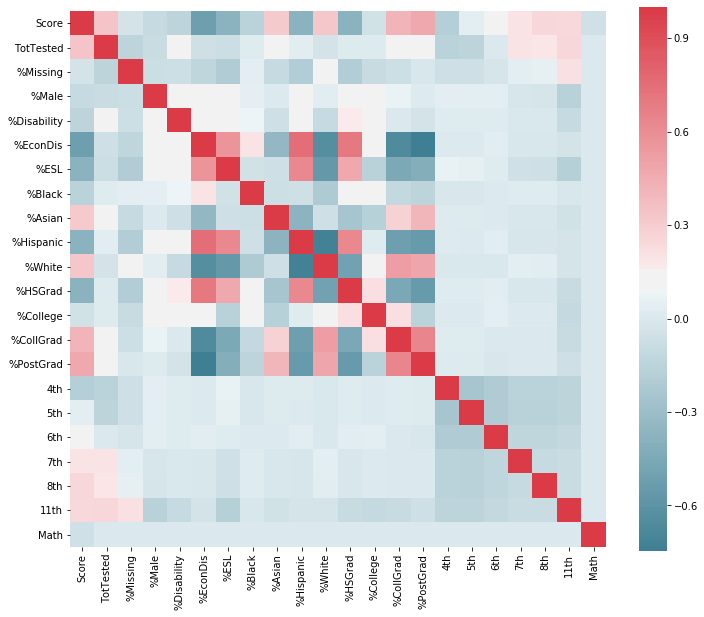

In [16]:
# Compute the correlation matrix
corr = scores.iloc[:,7:].drop(columns=['TotatSchool']).corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, square=True)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

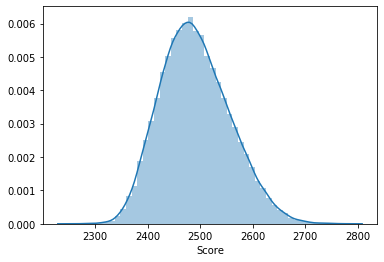

In [17]:
sns.distplot(scores['Score'])

Features: 
 ['%Male', '%Disability', '%EconDis', '%ESL', '%Black', '%Asian', '%Hispanic', '%White', '%HSGrad', '%College', '%CollGrad', '%PostGrad', '4th', '5th', '6th', '7th', '8th', '11th', 'Math']
For train set, MSE is 34.747 and R2 score is 0.721
For test set, MSE is 34.861 and R2 score is 0.718


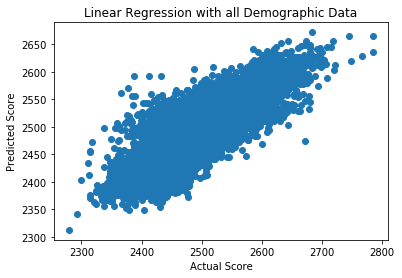

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Let's look at regression after dropping #students etc (except keep %Missing)
X = scores.iloc[:,11:]
print('Features: \n',list(X.columns))
y = scores['Score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
lm=LinearRegression(normalize=True) 
lm.fit(X_train,y_train) 

pred_train_lm= lm.predict(X_train)
print('For train set, MSE is {:.3f} and R2 score is {:.3f}'.format(np.sqrt(mean_squared_error(y_train,pred_train_lm)),
      r2_score(y_train, pred_train_lm)))

pred_test_lm= lm.predict(X_test)
print('For test set, MSE is {:.3f} and R2 score is {:.3f}'.format(np.sqrt(mean_squared_error(y_test,pred_test_lm)),
      r2_score(y_test, pred_test_lm)))

plt.scatter(y_test,pred_test_lm)
plt.title('Linear Regression with all Demographic Data')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

Features: 
 ['%Missing', '%ESL', '%HSGrad', '%College', '%CollGrad', '%PostGrad', '4th', '5th', '6th', '7th', '8th', '11th', 'Math']
For train set, MSE is 36.602 and R2 score is 0.690
For test set, MSE is 36.346 and R2 score is 0.693


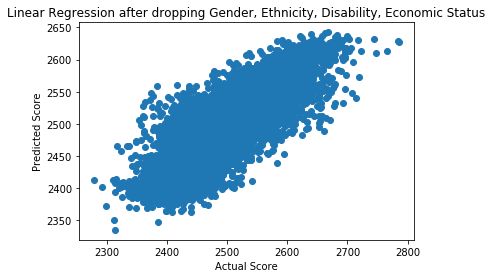

In [51]:
#Let's look at regression after dropping Gender, Ethnicity, Disability and Economic Status
X = scores.loc[:,['%Missing','%ESL','%HSGrad','%College','%CollGrad',
                  '%PostGrad','4th','5th','6th','7th','8th','11th','Math']]
print('Features: \n',list(X.columns))
y = scores['Score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
lm=LinearRegression(normalize=True) 
lm.fit(X_train,y_train) 

pred_train_lm= lm.predict(X_train)
print('For train set, MSE is {:.3f} and R2 score is {:.3f}'.format(np.sqrt(mean_squared_error(y_train,pred_train_lm)),
      r2_score(y_train, pred_train_lm)))

pred_test_lm= lm.predict(X_test)
print('For test set, MSE is {:.3f} and R2 score is {:.3f}'.format(np.sqrt(mean_squared_error(y_test,pred_test_lm)),
      r2_score(y_test, pred_test_lm)))

plt.scatter(y_test,pred_test_lm)
plt.title('Linear Regression after dropping Gender, Ethnicity, Disability, Economic Status')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

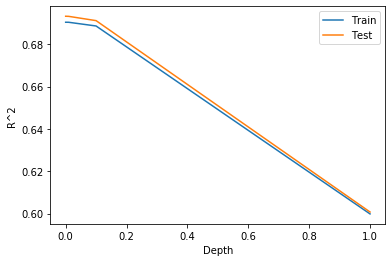

In [75]:
# Let's try Lasso regression
alphas = [0.0001,0.001,0.01,0.1,1]
train_mse = []
train_score = []
test_mse = []
test_score = []
for alpha in alphas:
    ls = Lasso(alpha=alpha,max_iter=1000)
    ls.fit(X_train, y_train) 
    pred_train_ls= ls.predict(X_train)
    train_mse.append(np.sqrt(mean_squared_error(y_train,pred_train_ls)))
    train_score.append(r2_score(y_train, pred_train_ls))

    pred_test_ls= ls.predict(X_test)
    test_mse.append(np.sqrt(mean_squared_error(y_test,pred_test_ls))) 
    test_score.append(r2_score(y_test, pred_test_ls))

plt.plot(alphas, train_score, label='Train')
plt.plot(alphas, test_score, label='Test')
plt.xlabel('Depth')
plt.ylabel('R^2')
plt.legend()
plt.show()

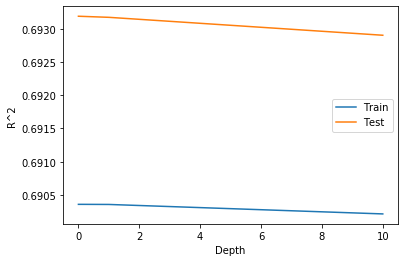

In [74]:
# Let's try Ridge regression to see if this increases accuracy
alphas = [0,0.0001,0.001,0.01,0.1,1,10]
train_mse = []
train_score = []
test_mse = []
test_score = []
for alpha in alphas:
    rr = Ridge(alpha=alpha)
    rr.fit(X_train, y_train) 
    pred_train_rr= rr.predict(X_train)
    train_mse.append(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
    train_score.append(r2_score(y_train, pred_train_rr))

    pred_test_rr= rr.predict(X_test)
    test_mse.append(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
    test_score.append(r2_score(y_test, pred_test_rr))

plt.plot(alphas, train_score, label='Train')
plt.plot(alphas, test_score, label='Test')
plt.xlabel('Depth')
plt.ylabel('R^2')
plt.legend()
plt.show()

We can see here that using regularization does not increase our accuracy, as the best score is achieve at alpha = 0

For train set, MSE is 33.532 and R2 score is 0.740
For test set, MSE is 35.125 and R2 score is 0.713


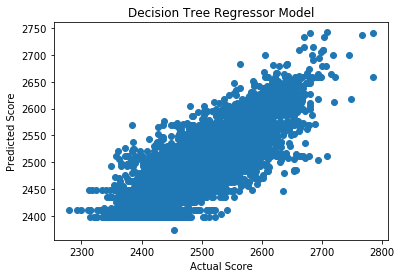

In [64]:
from sklearn.tree import DecisionTreeRegressor

# Let's use decision trees
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
regr = DecisionTreeRegressor(max_depth=9)
regr.fit(X_train,y_train) 

pred_train_regr= regr.predict(X_train)
print('For train set, MSE is {:.3f} and R2 score is {:.3f}'.format(np.sqrt(mean_squared_error(y_train,pred_train_regr)),
      r2_score(y_train, pred_train_regr)))

pred_test_regr= regr.predict(X_test)
print('For test set, MSE is {:.3f} and R2 score is {:.3f}'.format(np.sqrt(mean_squared_error(y_test,pred_test_regr)),
      r2_score(y_test, pred_test_regr)))

plt.scatter(y_test,pred_test_regr)
plt.title('Decision Tree Regressor Model')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

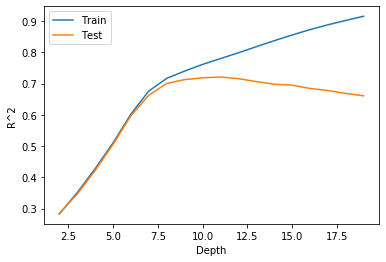

In [73]:
depths = range(2,20)
train_mse = []
train_score = []
test_mse = []
test_score = []
for depth in depths:
    rr = DecisionTreeRegressor(max_depth=depth)
    rr.fit(X_train, y_train) 
    pred_train_rr= rr.predict(X_train)
    train_mse.append(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
    train_score.append(r2_score(y_train, pred_train_rr))

    pred_test_rr= rr.predict(X_test)
    test_mse.append(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
    test_score.append(r2_score(y_test, pred_test_rr))

plt.plot(depths, train_score, label='Train')
plt.plot(depths, test_score, label='Test')
plt.xlabel('Depth')
plt.ylabel('R^2')
plt.legend()
plt.show()

For train set, MSE is 32.805 and R2 score is 0.751
For test set, MSE is 33.291 and R2 score is 0.743


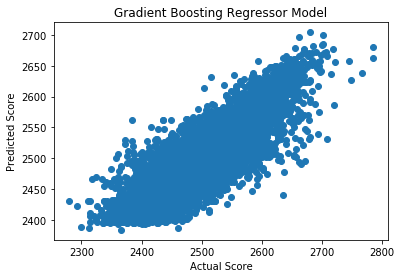

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# Let's use Gradient Boosting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                max_depth=4, random_state=0, loss='ls').fit(X_train, y_train)
est.fit(X_train,y_train) 

pred_train_est= est.predict(X_train)
print('For train set, MSE is {:.3f} and R2 score is {:.3f}'.format(np.sqrt(mean_squared_error(y_train,pred_train_est)),
      r2_score(y_train, pred_train_est)))

pred_test_est= est.predict(X_test)
print('For test set, MSE is {:.3f} and R2 score is {:.3f}'.format(np.sqrt(mean_squared_error(y_test,pred_test_est)),
      r2_score(y_test, pred_test_est)))

plt.scatter(y_test,pred_test_est)
plt.title('Gradient Boosting Regressor Model')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

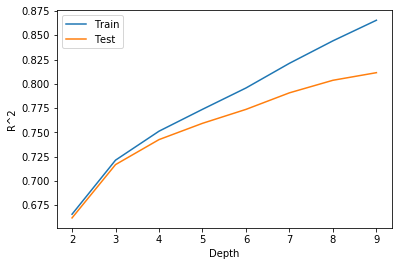

In [72]:
depths = range(2,10)
train_mse = []
train_score = []
test_mse = []
test_score = []
for depth in depths:
    rr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                max_depth=depth, random_state=0, loss='ls').fit(X_train, y_train)
    rr.fit(X_train, y_train) 
    pred_train_rr= rr.predict(X_train)
    train_mse.append(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
    train_score.append(r2_score(y_train, pred_train_rr))

    pred_test_rr= rr.predict(X_test)
    test_mse.append(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
    test_score.append(r2_score(y_test, pred_test_rr))

plt.plot(depths, train_score, label='Train')
plt.plot(depths, test_score, label='Test')
plt.xlabel('Depth')
plt.ylabel('R^2')
plt.legend()
plt.show()